In [2]:
from sklearn.svm import SVR, SVC
import pandas as pd
from sklearn.model_selection import train_test_split
#for visualization
import matplotlib.pyplot as plt


In [4]:
titanic= pd.read_csv('tested.csv')

titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


Here, we remove the columns we are not going to use

In [5]:
titanic=titanic.drop(columns=['PassengerId','Name'])

In [6]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

- since ids are auto incrementing numbers, we can drop them

In [7]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [23]:
# -methods to clean data
# filling(forward/backward), droping, imputation, interpolation
# filling-age
# dropping-drop the whole column
# interpolation-the math way
# imputation---------
#understnd the descriptive stats-understand the distribution-skewed/normalised-onlt columns that are numbers 
#skewed-median/ normal-mean
#then for categorical data, we use the mode-non numerical columns

methods to clean data
filling(forward/backward), droping, imputation, interpolation
filling-age
dropping-drop the whole column
interpolation-the math way
imputation---------
understnd the descriptive stats-understand the distribution-skewed/normalised-onlt columns that are numbers 
skewed-median/ normal-mean
then for categorical data, we use the mode-non numerical columns

The code below is used to show the data of the different columns to know whether the data is skewed or normalised.

In [8]:
cont_data=titanic.select_dtypes(exclude='object')

def plothisto(cont_data):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(cont_data.columns):
        plt.subplot(3,3,i+1)
        plt.hist(titanic[col])
        plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

This shows the different columns 

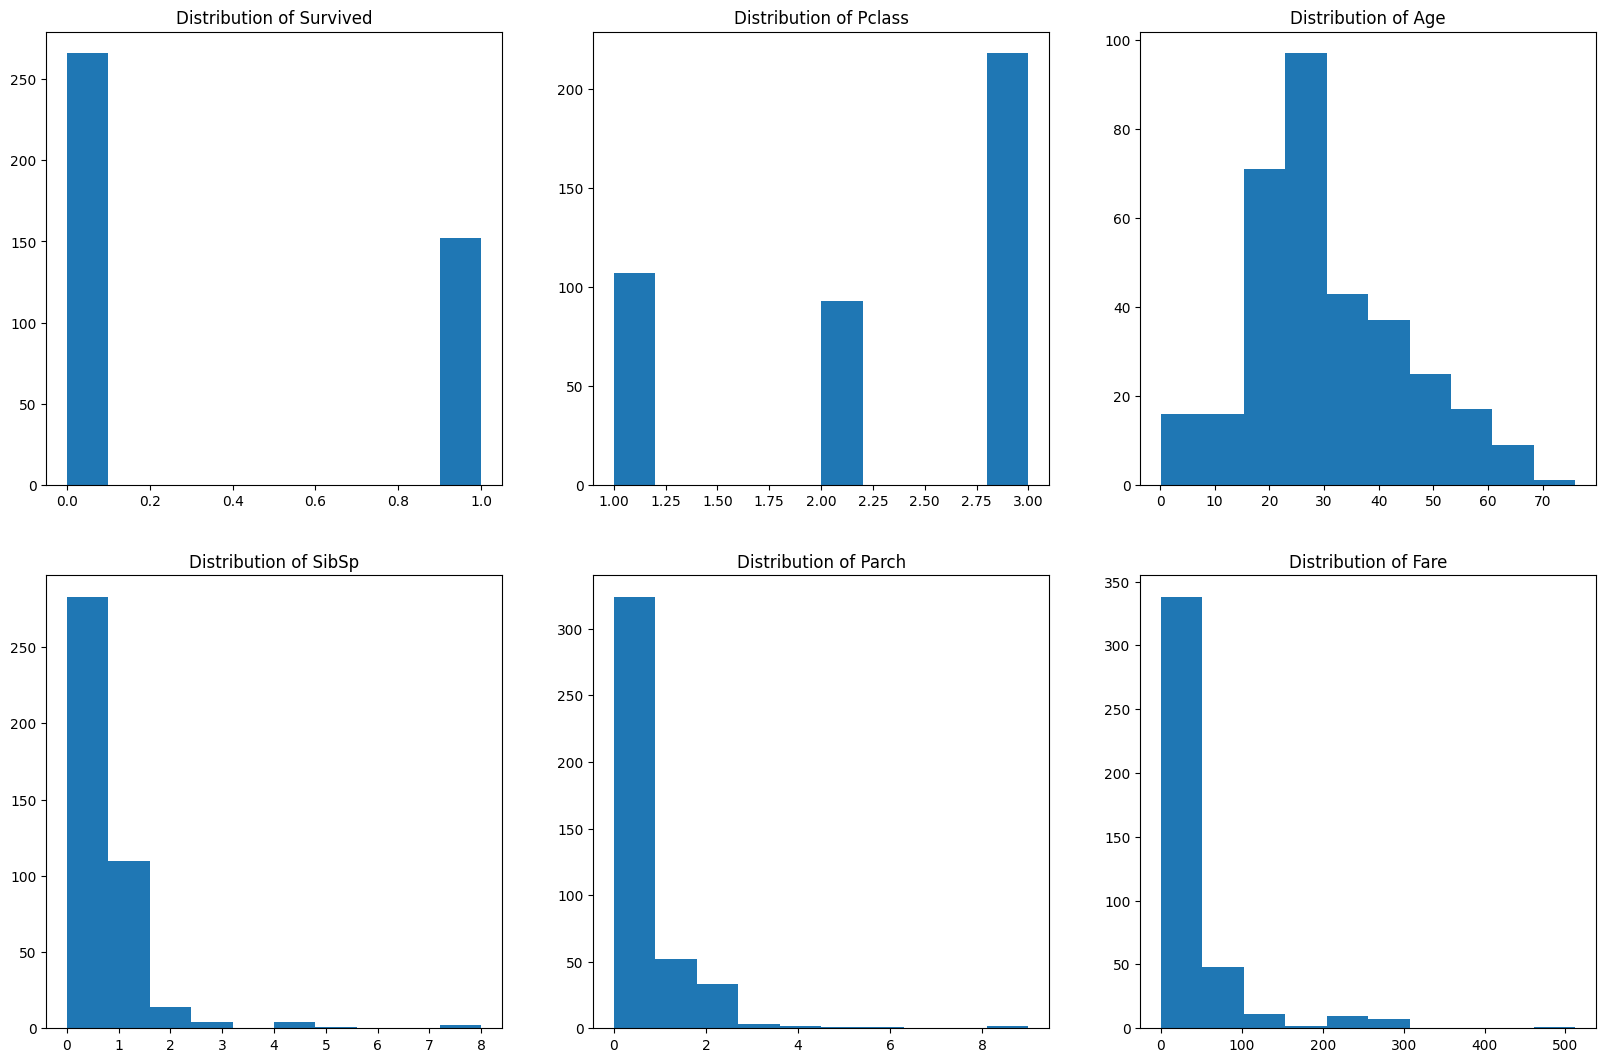

In [9]:
plothisto(cont_data)

Below we are replacing all missing values in age and fare with the median

In [10]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median())

#or

# titanic["Age"].fillna(titanic["Age"].median(), inplace=True)

In [11]:
titanic["Fare"]=titanic["Fare"].fillna(titanic["Fare"].median())

Here, we replace the missing values with the mode for categorical data ie non numerical data

In [12]:
titanic["Cabin"]=titanic["Cabin"].fillna(titanic["Cabin"].mode()[0])



shows the list of values in cabin in order

In [13]:
titanic["Cabin"].mode()

0    B57 B59 B63 B66
Name: Cabin, dtype: object

Shows the sum of missing values in each column

In [14]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

below we check the unique values of the different columns to see what kind of encoding can be used 
for cabin and Embarked we shall use the label encoder because it can give every unique value, a number
but there is also the one hot encoding that is used for 

In [15]:
# titanic['Cabin'].unique()
titanic['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

we now do encoding to ensure that charcters can  be read by the computer
this changes the values to numbers for easy reading

we import the labelencoder since its what we are going to use.

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

titanic['Cabin']=labelencoder.fit_transform(titanic['Cabin'])
titanic['Embarked']=labelencoder.fit_transform(titanic['Embarked'])
titanic['Sex']=labelencoder.fit_transform(titanic['Sex'])
titanic['Ticket']=labelencoder.fit_transform(titanic['Ticket'])

In [17]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,34.5,0,0,152,7.8292,15,1
1,1,3,0,47.0,1,0,221,7.0000,15,2
2,0,2,1,62.0,0,0,73,9.6875,15,1
3,0,3,1,27.0,0,0,147,8.6625,15,2
4,1,3,0,22.0,1,1,138,12.2875,15,2
...,...,...,...,...,...,...,...,...,...,...
413,0,3,1,27.0,0,0,267,8.0500,15,2
414,1,1,0,39.0,0,0,324,108.9000,22,0
415,0,3,1,38.5,0,0,346,7.2500,15,2
416,0,3,1,27.0,0,0,220,8.0500,15,2


Here we create the training and testing sets

In [18]:
# titanic['Survived'] = titanic.survived

X = titanic[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']] #predictor
y = titanic['Survived']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We train the model using the SVC supervised learning method

In [46]:


# model = SVC()
# model = SVC(kernel='rbf',C=20,gamma='auto')
model = SVC(kernel='linear',C=1,gamma='auto')
#fit the model
model.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [40]:

# model.fit(X_train,y_train)
# model.score(X_test, y_test)

0.5833333333333334

hyperparameter tuning using gridsearchcv

In [44]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X, y)
clf.cv_results_



{'mean_fit_time': array([0.01862683, 1.20534606, 0.01738772, 1.12976923, 0.03100657,
        0.92956729]),
 'std_fit_time': array([0.00688345, 0.67302907, 0.0035655 , 0.69708931, 0.00896144,
        0.51762876]),
 'mean_score_time': array([0.00885434, 0.00312438, 0.0062592 , 0.00312505, 0.01101789,
        0.        ]),
 'std_score_time': array([0.006956  , 0.00624876, 0.00766594, 0.0062501 , 0.01326234,
        0.        ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],
 'split0_test_s

In [45]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018627,0.006883,0.008854,0.006956,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.630952,0.571429,0.595238,0.602410,0.602410,0.600488,0.019013,4
1,1.205346,0.673029,0.003124,0.006249,1,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
2,0.017388,0.003566,0.006259,0.007666,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.619048,0.535714,0.571429,0.578313,0.590361,0.578973,0.027072,5
3,1.129769,0.697089,0.003125,0.006250,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
4,0.031007,0.008961,0.011018,0.013262,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.619048,0.535714,0.571429,0.578313,0.590361,0.578973,0.027072,5
5,0.929567,0.517629,0.000000,0.000000,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1


In [54]:
df[['param_C','param_kernel','mean_test_score','rank_test_score']]

,param_C,param_kernel,mean_test_score,rank_test_score
0,1,rbf,0.600488,4
1,1,linear,1.000000,1
2,10,rbf,0.578973,5
3,10,linear,1.000000,1
4,20,rbf,0.578973,5
5,20,linear,1.000000,1


we perform hyperparameter tuning to improve model accuracy

In [56]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(X, y)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,linear,1.000000
1,10,rbf,0.578973


In [48]:
y_pred=model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [53]:

accu=accuracy_score(y_test, y_pred)
classification=classification_report(y_test, y_pred)
conf=confusion_matrix(y_test, y_pred)


print("Accuracy: ", accu*100)
print('Classification report:')
print(classification)
print(conf)

Accuracy:  100.0
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

[[50  0]
 [ 0 34]]


To improve the accuracy of this model, we use hyperparameter tuning
